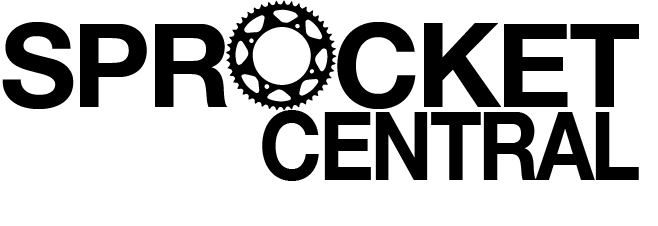

In [1]:
from PIL import Image

img = Image.open('sprocket_central_logo.png')
img

### The Sprocket Central project is a data-driven initiative aimed at optimizing resource allocation for targeted marketing and improving performance by focusing on high-value customers. Sprocket Central Pty Ltd, a fictional company, has provided a dataset containing customer information, demographics, transaction history, and attributes. The goal of the project is to extract valuable customer insights from this dataset to drive targeted marketing strategies and enhance overall business performance.

+ Data Sources: The project utilizes three main datasets: Customer Demographic, Customer Address, and Transactions. These datasets contain information about customers, their demographics, transaction history, and addresses.

#### DATA COLLECTION  CLEANING AND PREPARATION 

In [2]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

cols_to_load = list(range (14)) + list(range(9, 14))
Transactions_df = pd.read_csv('C:\\Users\\HP\\Desktop\\BOOK7.csv', usecols=cols_to_load)
Transactions_df.head()
Transactions_df.head(50)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,$71.49,$53.62,12/2/2012,$17.87
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,"$2,091.47",$388.92,3/3/2014,"$1,702.55"
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,"$1,793.43",$248.82,7/20/1999,"$1,544.61"
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"$1,198.46",$381.10,12/16/1998,$817.36
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,"$1,765.30",$709.48,8/10/2015,"$1,055.82"
5,6,25,2339,3/8/2017,True,Approved,Giant Bicycles,Road,medium,medium,"$1,538.99",$829.65,11/10/2006,$709.34
6,7,22,1542,4/21/2017,True,Approved,WeareA2B,Standard,medium,medium,$60.34,$45.26,7/15/1993,$15.08
7,8,15,2459,7/15/2017,False,Approved,WeareA2B,Standard,medium,medium,"$1,292.84",$13.44,4/12/2009,"$1,279.40"
8,9,67,1305,8/10/2017,False,Approved,Solex,Standard,medium,large,"$1,071.23",$380.74,8/5/1991,$690.49
9,10,12,3262,8/30/2017,True,Approved,WeareA2B,Standard,medium,medium,"$1,231.15",$161.60,8/17/2004,"$1,069.55"


In [5]:
# Check for missing values in each column
missing_values = Transactions_df.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
Profit                     0
dtype: int64


In [6]:
# Check for boolean columns
bool_cols = Transactions_df.select_dtypes(include='bool').columns.tolist()
print(bool_cols)

# Convert boolean columns to numeric
Transactions_df[bool_cols] = Transactions_df[bool_cols].astype(int)


['online_order']


In [7]:
import numpy as np

# Calculate the IQR and identify any outliers
Q1 = Transactions_df.quantile(0.25)
Q3 = Transactions_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((Transactions_df < lower_bound) | (Transactions_df > upper_bound)).any(axis=1)

# Print the number of outliers in each column
print("Number of outliers:")
print(outliers.sum())

Number of outliers:
0


In [8]:
import pandas as pd

cols_to_load = list(range (20)) + list(range(9, 20))
NewCustomerList_df = pd.read_csv('C:\\Users\\HP\\Desktop\\Book8.csv', usecols=cols_to_load)
NewCustomerList_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,Date_of_birth,AGE,AGE CATEGORY,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Ranking
0,1,Chickie,Brister,Male,86,7/12/1957,65.88,70,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1
1,2,Morly,Genery,Male,69,3/22/1970,53.18,60,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1
2,4,Ardelis,Forrester,Female,10,8/28/1974,48.74,50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1
3,5,Lucine,Stutt,Female,64,1/28/1979,44.32,50,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4
4,6,Melinda,Hadlee,Female,34,9/21/1965,57.68,60,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4


In [9]:
print(NewCustomerList_df.shape)

(715, 20)


In [10]:
# Check for missing values in each column
missing_values = NewCustomerList_df.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
Date_of_birth                          0
AGE                                    0
AGE CATEGORY                           0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Ranking                                0
dtype: int64


In [11]:
Q1 = NewCustomerList_df.quantile(0.25)
Q3 = NewCustomerList_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((NewCustomerList_df < lower_bound) | (NewCustomerList_df > upper_bound)).any(axis=1)

print("Number of outliers:")
print(outliers.sum())


Number of outliers:
25


In [12]:
Q1 = NewCustomerList_df['past_3_years_bike_related_purchases'].quantile(0.25)
Q3 = NewCustomerList_df['past_3_years_bike_related_purchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((NewCustomerList_df['past_3_years_bike_related_purchases'] < lower_bound) | (NewCustomerList_df['past_3_years_bike_related_purchases'] > upper_bound))

print("Number of outliers:")
print(outliers.sum())

# Calculate the 5th and 95th percentiles of the column
lower_bound = NewCustomerList_df['past_3_years_bike_related_purchases'].quantile(0.05)
upper_bound = NewCustomerList_df['past_3_years_bike_related_purchases'].quantile(0.95)

# Cap the outliers to the 5th and 95th percentiles
NewCustomerList_df['past_3_years_bike_related_purchases'] = np.where(NewCustomerList_df['past_3_years_bike_related_purchases'] < lower_bound, lower_bound, NewCustomerList_df['past_3_years_bike_related_purchases'])
NewCustomerList_df['past_3_years_bike_related_purchases'] = np.where(NewCustomerList_df['past_3_years_bike_related_purchases'] > upper_bound, upper_bound, NewCustomerList_df['past_3_years_bike_related_purchases'])


Number of outliers:
0


In [13]:
Q1 = NewCustomerList_df['property_valuation'].quantile(0.25)
Q3 = NewCustomerList_df['property_valuation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((NewCustomerList_df['property_valuation'] < lower_bound) | (NewCustomerList_df['property_valuation'] > upper_bound))

print("Number of outliers:")
print(outliers.sum())

# Calculate the 5th and 95th percentiles of the column
lower_bound = NewCustomerList_df['property_valuation'].quantile(0.05)
upper_bound = NewCustomerList_df['property_valuation'].quantile(0.95)

# Cap the outliers to the 5th and 95th percentiles
NewCustomerList_df['property_valuation'] = np.where(NewCustomerList_df['property_valuation'] < lower_bound, lower_bound, NewCustomerList_df['property_valuation'])
NewCustomerList_df['property_valuation'] = np.where(NewCustomerList_df['property_valuation'] > upper_bound, upper_bound, NewCustomerList_df['property_valuation'])


Number of outliers:
25


In [14]:
Q1 = NewCustomerList_df.quantile(0.25)
Q3 = NewCustomerList_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((NewCustomerList_df < lower_bound) | (NewCustomerList_df > upper_bound)).any(axis=1)

print("Number of outliers:")
print(outliers.sum())


Number of outliers:
0


In [15]:
cols_to_load = list(range(6)) + list(range(6, 6))
CustomerAddress_df = pd.read_csv('C:\\Users\\HP\\Desktop\\CustomerAddress1.csv', usecols=cols_to_load, encoding='ISO-8859-1')
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
# Check for missing values in each column
missing_values = CustomerAddress_df.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


In [17]:
Q1 = CustomerAddress_df.quantile(0.25)
Q3 = CustomerAddress_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((CustomerAddress_df < lower_bound) | (CustomerAddress_df > upper_bound)).any(axis=1)

print("Number of outliers:")
print(outliers.sum())


Number of outliers:
0


In [18]:
cols_to_load = list(range(13)) + list(range(9, 13))
CustomerDemographic_df = pd.read_csv('C:\\Users\\HP\\Desktop\\Book8.csv', usecols=cols_to_load, encoding='ISO-8859-1')
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,Date_of_birth,AGE,AGE CATEGORY,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car
0,1,Chickie,Brister,Male,86,7/12/1957,65.88,70,General Manager,Manufacturing,Mass Customer,N,Yes
1,2,Morly,Genery,Male,69,3/22/1970,53.18,60,Structural Engineer,Property,Mass Customer,N,No
2,4,Ardelis,Forrester,Female,10,8/28/1974,48.74,50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No
3,5,Lucine,Stutt,Female,64,1/28/1979,44.32,50,Account Representative III,Manufacturing,Affluent Customer,N,Yes
4,6,Melinda,Hadlee,Female,34,9/21/1965,57.68,60,Financial Analyst,Financial Services,Affluent Customer,N,No


In [19]:
# Check for missing values in each column
missing_values = CustomerDemographic_df.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
Date_of_birth                          0
AGE                                    0
AGE CATEGORY                           0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
dtype: int64


In [20]:
cols_to_load = list(range(28)) + list(range(9, 28))
Merged_Olddf = pd.read_csv('C:\\Users\\HP\\Desktop\\Book11.csv', usecols=cols_to_load, encoding='ISO-8859-1')
Merged_Olddf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,AGE CATEGORY,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,...,50,Business Systems Development Analyst,Financial Services,Affluent Customer,N,Yes,19,3064,VIC,6
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,...,50,Actuary,Financial Services,Affluent Customer,N,Yes,19,2196,NSW,5
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,...,50,Engineer III,Manufacturing,Affluent Customer,N,Yes,16,2835,NSW,1
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,...,70,Data Coordiator,Manufacturing,Mass Customer,N,No,19,2096,NSW,10
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,...,50,Geological Engineer,Manufacturing,Mass Customer,N,No,17,2292,NSW,7


In [21]:
# Check for missing values in each column
missing_values =Merged_Olddf.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
Profit                                 0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
AGE                                    0
AGE CATEGORY                           0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure          

In [22]:
Q1 = CustomerDemographic_df.quantile(0.25)
Q3 = CustomerDemographic_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((CustomerDemographic_df < lower_bound) | (CustomerDemographic_df > upper_bound)).any(axis=1)

print("Number of outliers:")
print(outliers.sum())


Number of outliers:
0


### DATA EXPLORATION AND ANALYSIS 

Customer Segmantation of Past Bike Purchase vs AGE 

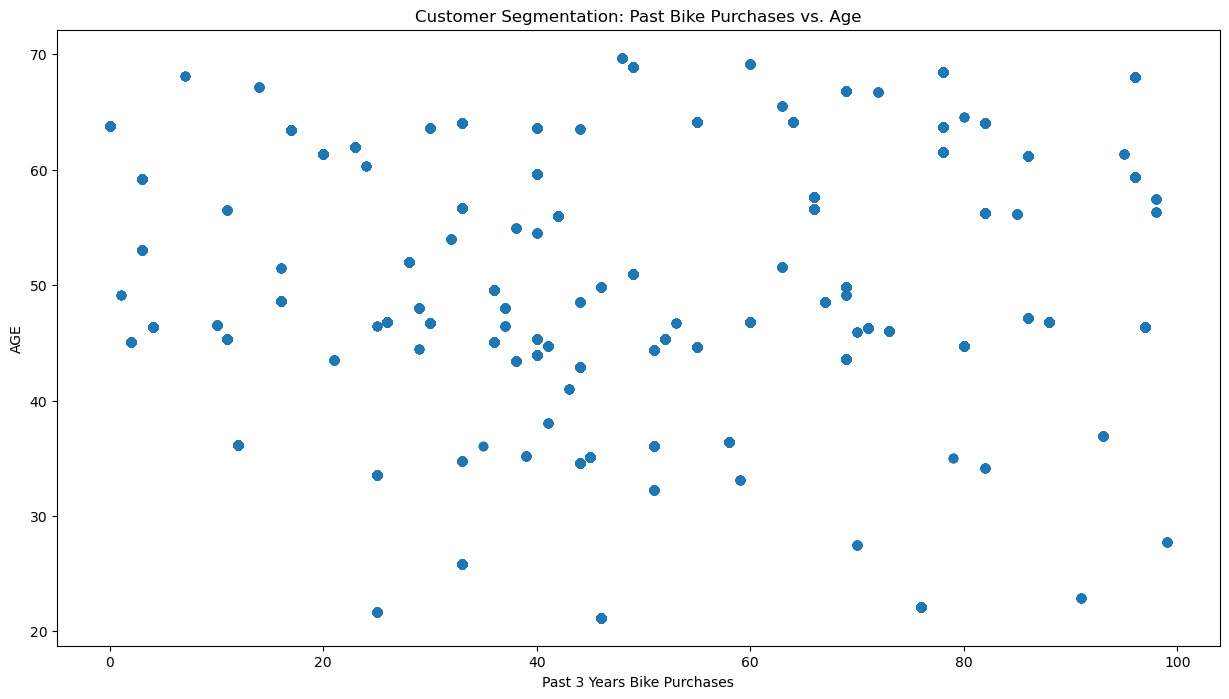

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Set the plot size for the bar plot
plt.figure(figsize=(15, 8))
# Scatter Plot: Past 3 Years Bike Purchases vs. Age
plt.scatter(Merged_Olddf['past_3_years_bike_related_purchases'], Merged_Olddf['AGE'])
plt.xlabel('Past 3 Years Bike Purchases')
plt.ylabel('AGE')
plt.title('Customer Segmentation: Past Bike Purchases vs. Age')
plt.show()

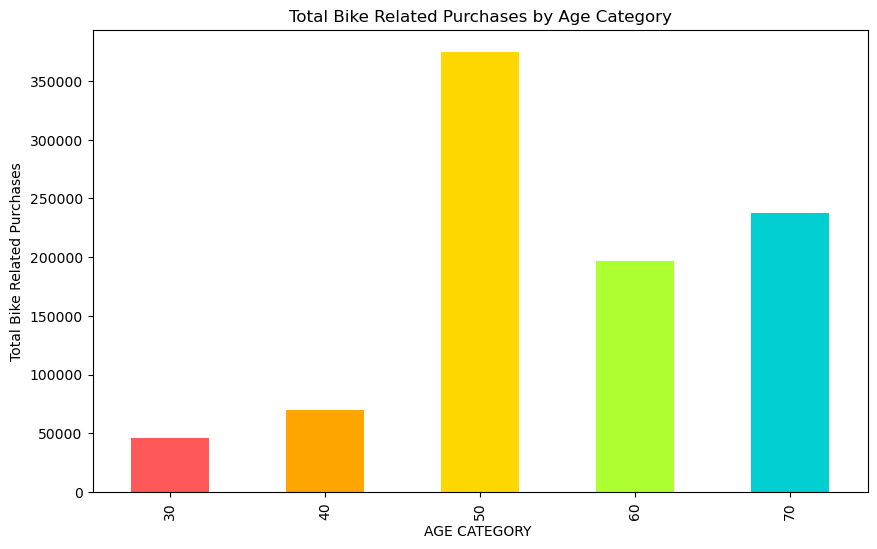

In [24]:
import matplotlib.pyplot as plt

# Define custom colors for the age categories
colors = ['#FF5858', '#FFA500', '#FFD700', '#ADFF2F', '#00CED1', '#4169E1', '#9932CC']

# Group the data by age category and calculate the sum of bike-related purchases
age_purchases = Merged_Olddf.groupby('AGE CATEGORY ')['past_3_years_bike_related_purchases'].sum()

# Plot the bar chart with custom colors
plt.figure(figsize=(10, 6))
age_purchases.plot(kind='bar', color=colors)
plt.xlabel('AGE CATEGORY ')
plt.ylabel('Total Bike Related Purchases')
plt.title('Total Bike Related Purchases by Age Category')
plt.show()


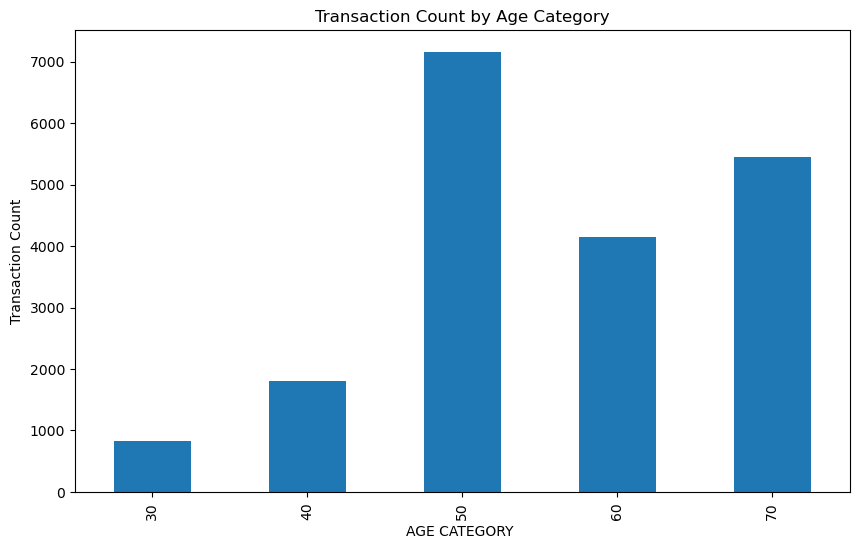

In [25]:
import matplotlib.pyplot as plt

# Group the data by age category and count the transactions
age_transactions = Merged_Olddf.groupby('AGE CATEGORY ')['transaction_id'].count()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_transactions.plot(kind='bar')
plt.xlabel('AGE CATEGORY ')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Age Category')
plt.show()


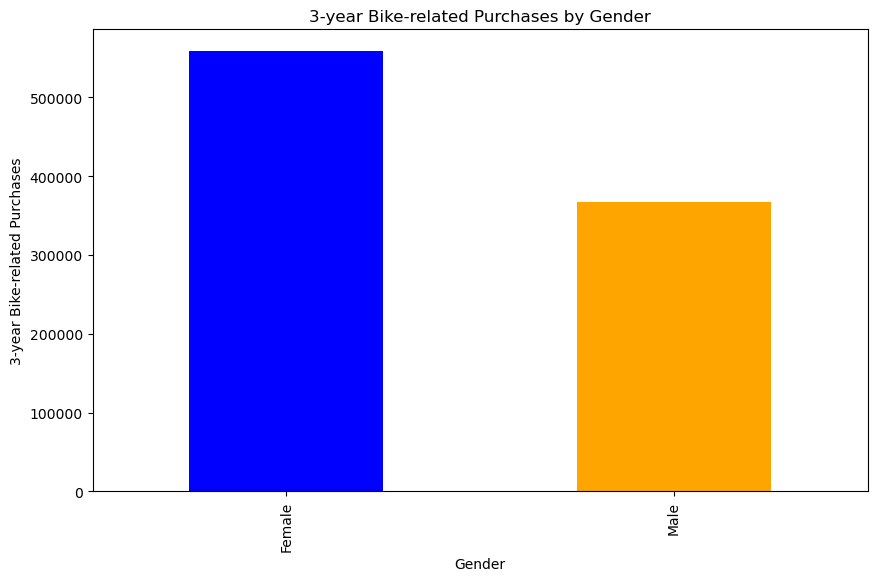

In [26]:
import matplotlib.pyplot as plt

# Group the data by gender and count the 3-year bike-related purchases
gender_purchases = Merged_Olddf.groupby('gender')['past_3_years_bike_related_purchases'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
gender_purchases.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('3-year Bike-related Purchases')
plt.title('3-year Bike-related Purchases by Gender')
plt.show()


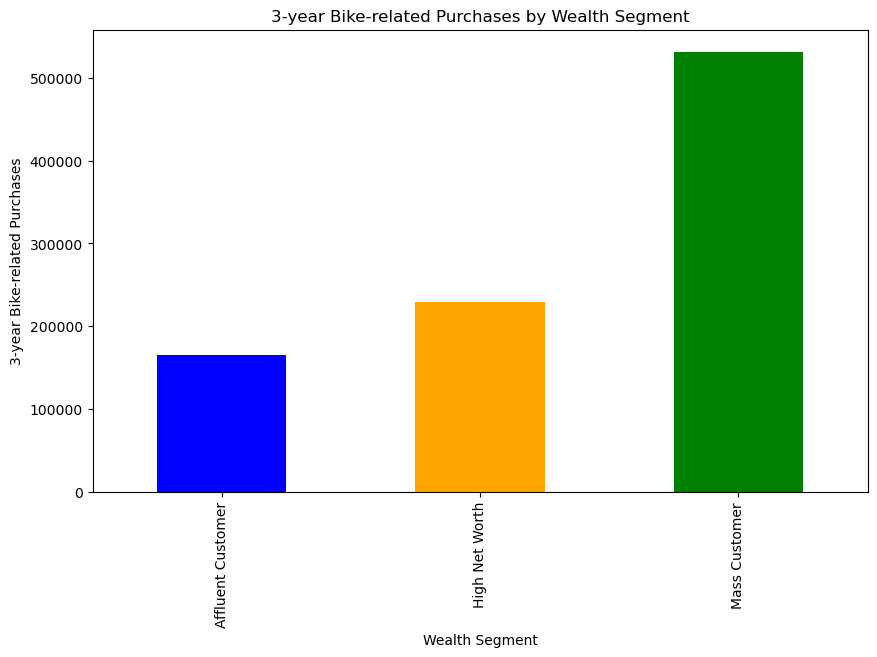

In [27]:
import matplotlib.pyplot as plt

# Group the data by wealth segment and count the 3-year bike-related purchases
wealth_purchases = Merged_Olddf.groupby('wealth_segment')['past_3_years_bike_related_purchases'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
wealth_purchases.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel('Wealth Segment')
plt.ylabel('3-year Bike-related Purchases')
plt.title('3-year Bike-related Purchases by Wealth Segment')
plt.show()


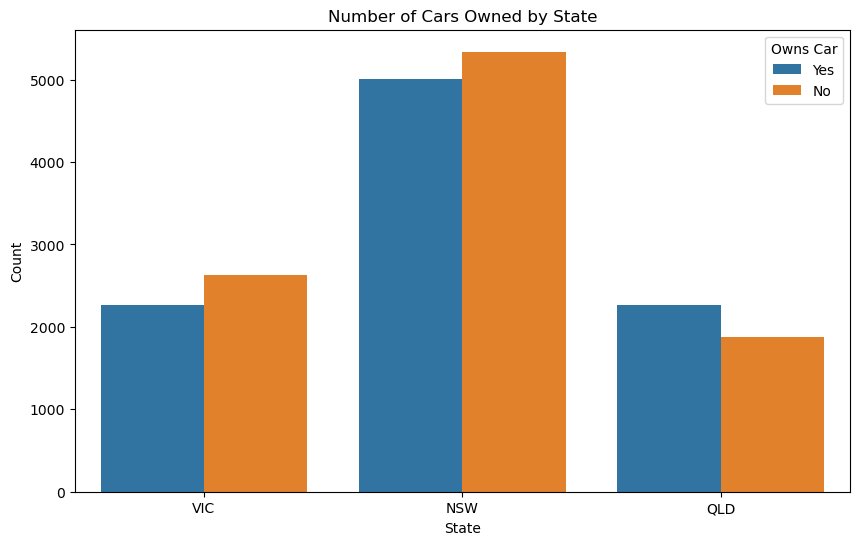

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by state and count the number of cars owned
state_car_ownership = Merged_Olddf.groupby('state')['owns_car'].value_counts().unstack()

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=Merged_Olddf, x='state', hue='owns_car')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Cars Owned by State')
plt.legend(title='Owns Car', loc='upper right')
plt.show()


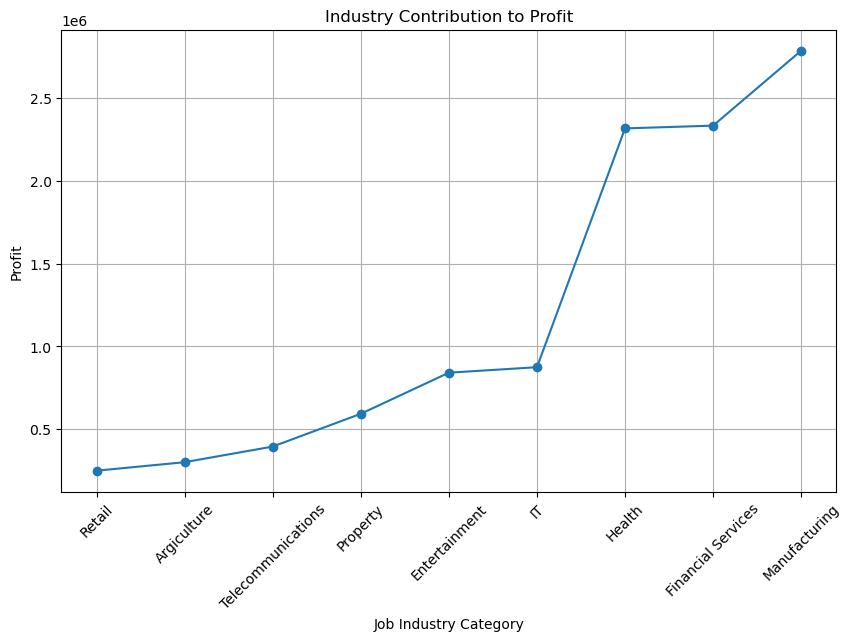

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Remove dollar signs and commas, and convert to numeric format
Merged_Olddf['Profit '] = Merged_Olddf['Profit '].replace('[\$,]', '', regex=True).astype(float)

# Group the data by job industry category and calculate the sum of profit
industry_profit = Merged_Olddf.groupby('job_industry_category')['Profit '].sum().sort_values()

# Plot the line chart
plt.figure(figsize=(10, 6))
industry_profit.plot(kind='line', marker='o')
plt.xlabel('Job Industry Category')
plt.ylabel('Profit')
plt.title('Industry Contribution to Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



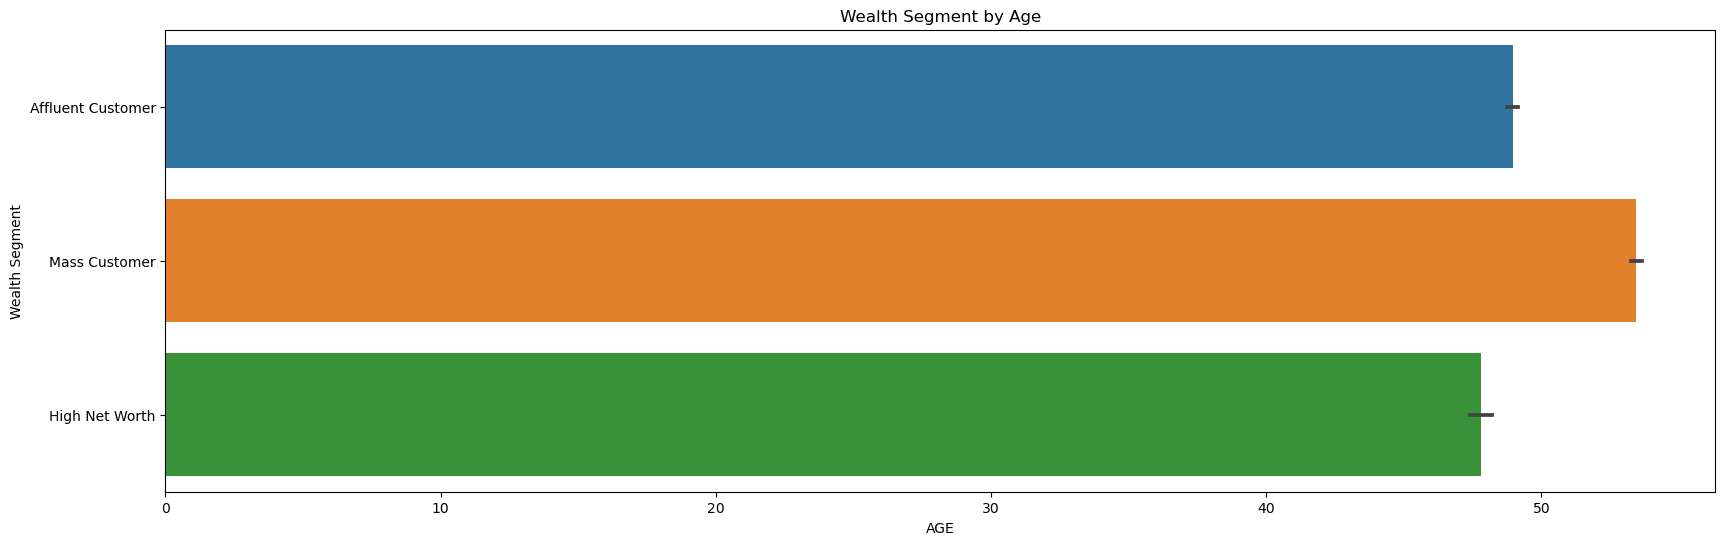

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size for the bar plot
plt.figure(figsize=(20, 6))

# Create the bar plot
sns.barplot(x='AGE', y='wealth_segment', data=Merged_Olddf)

# Set the labels and title
plt.xlabel('AGE')
plt.ylabel('Wealth Segment')
plt.title('Wealth Segment by Age')

# Show the plot
plt.show()




Based on the dataset analysis, the findings reveal that older customers, particularly females, show a strong inclination towards purchasing bikes. Mass customers, including those in the IT, Health, Financial, and Manufacturing sectors, make up a significant portion of the customer base. To attract more customers, implementing targeted marketing strategies, enhancing the overall customer experience, diversifying product offerings, exploring collaborations, and continuously analyzing customer data would be recommended.

In [31]:
cols_to_load = list(range(47)) + list(range(9, 47))
Merged_NEWdf = pd.read_csv('C:\\Users\\HP\\Desktop\\Book13.csv', usecols=cols_to_load, encoding='ISO-8859-1')
Merged_NEWdf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment.1,deceased_indicator.1,owns_car.1,tenure.1,address,postcode.1,state.1,property_valuation.1,Ranking,Valuing
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,14.0,45 Shopko Center,4500.0,QLD,6.0,1.0,1.718750
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,No,16.0,14 Mccormick Park,2113.0,NSW,11.0,1.0,1.718750
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,...,Affluent Customer,N,No,10.0,5 Colorado Crossing,3505.0,VIC,5.0,1.0,1.718750
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,...,Affluent Customer,N,Yes,5.0,207 Annamark Plaza,4814.0,QLD,1.0,4.0,1.703125
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,N,No,19.0,115 Montana Place,2093.0,NSW,9.0,4.0,1.703125


In [32]:
# Check for missing values in each column
missing_values = Merged_NEWdf.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

transaction_id                               0
product_id                                   0
customer_id                                  0
transaction_date                             0
online_order                                 0
order_status                                 0
brand                                        0
product_line                                 0
product_class                                0
product_size                                 0
list_price                                   0
standard_cost                                0
product_first_sold_date                      0
Profit                                       0
gender                                       0
past_3_years_bike_related_purchases          0
DOB                                          0
AGE                                          0
AGE CATEGORY                                 0
job_title                                    0
job_industry_category                        0
wealth_segmen

In [33]:
Merged_NEWdf.dropna(inplace=True)
Merged_NEWdf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment.1,deceased_indicator.1,owns_car.1,tenure.1,address,postcode.1,state.1,property_valuation.1,Ranking,Valuing
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,14.0,45 Shopko Center,4500.0,QLD,6.0,1.0,1.718750
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,No,16.0,14 Mccormick Park,2113.0,NSW,11.0,1.0,1.718750
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,...,Affluent Customer,N,No,10.0,5 Colorado Crossing,3505.0,VIC,5.0,1.0,1.718750
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,...,Affluent Customer,N,Yes,5.0,207 Annamark Plaza,4814.0,QLD,1.0,4.0,1.703125
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,N,No,19.0,115 Montana Place,2093.0,NSW,9.0,4.0,1.703125


In [34]:
Merged_NEWdf.rename(columns={'Profit ': 'Profit'}, inplace=True)

In [35]:
print(Merged_NEWdf.columns)


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'AGE', 'AGE CATEGORY ',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'postcode', 'state',
       'property_valuation', 'first_name', 'last_name', 'gender.1',
       'past_3_years_bike_related_purchases.1', 'Date_of_birth', 'AGE.1',
       'AGE CATEGORY', 'job_title.1', 'job_industry_category.1',
       'wealth_segment.1', 'deceased_indicator.1', 'owns_car.1', 'tenure.1',
       'address', 'postcode.1', 'state.1', 'property_valuation.1', 'Ranking',
       'Valuing'],
      dtype='object')


In [36]:
# Check for missing values in each column
missing_values = Merged_NEWdf.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
Profit                                   0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
AGE                                      0
AGE CATEGORY                             0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car   

In [37]:
# Imputation
Merged_NEWdf_filled = Merged_NEWdf.fillna(method='ffill')  # Forward fill missing values
# Alternatively, you can use backward fill
Merged_NEWdf_filled = Merged_NEWdf.fillna(method='bfill')  # Backward fill missing values

# Check if there are still any missing values
missing_values = Merged_NEWdf_filled.isnull().sum()
print(missing_values)


transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
Profit                                   0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
AGE                                      0
AGE CATEGORY                             0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car   

In [38]:
print(Merged_NEWdf.shape)

(715, 47)


### DATA MODELING 

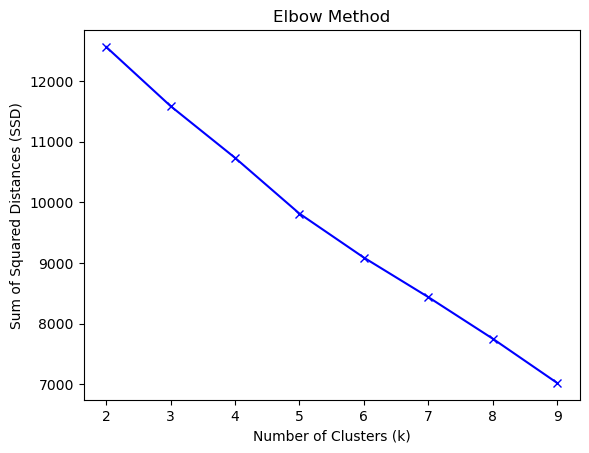

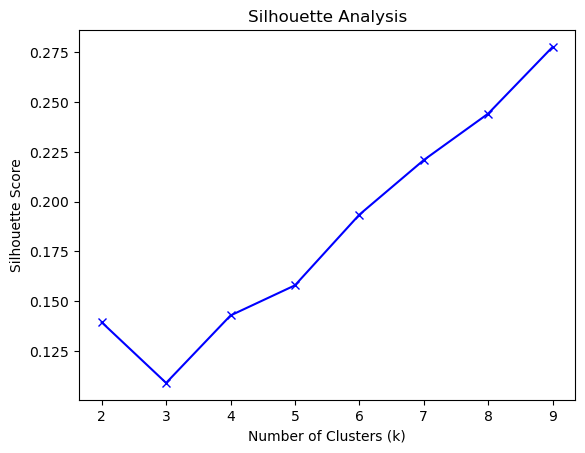

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
selected_features = ['AGE', 'gender', 'job_industry_category', 'wealth_segment', 'property_valuation', 'past_3_years_bike_related_purchases', 'owns_car', 'tenure']

merged_dataset_subset = Merged_NEWdf[selected_features]

# Perform one-hot encoding on the categorical columns
merged_dataset_encoded = pd.get_dummies(merged_dataset_subset)

# Scale the encoded dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_dataset_encoded)

# Define a range of k values to test
k_values = range(2, 10)

# Initialize lists to store the SSD and silhouette scores
ssd = []
silhouette_scores = []

# Perform k-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    ssd.append(kmeans.inertia_)
    
    # Calculate the silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

    # Fit the scaled data to the model
    kmeans.fit(scaled_data)

# Plot the elbow curve
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


         transaction_id  product_id  customer_id  online_order  \
Cluster                                                          
0            333.366492   43.424084  2297.989529      0.450262   
1            358.896296   52.044444  1919.088889      0.437037   
2            371.359649   47.885965  1562.710526      0.456140   
3            373.520833   45.479167   148.645833      0.395833   
4            398.995595   44.709251  1736.832599      0.515419   

         past_3_years_bike_related_purchases        AGE  AGE CATEGORY   \
Cluster                                                                  
0                                  39.691099  57.432827      62.879581   
1                                  32.637037  49.569185      55.407407   
2                                  65.026316  44.927982      48.859649   
3                                  50.604167  30.856458      37.708333   
4                                  53.110132  54.876079      58.986784   

            tenure

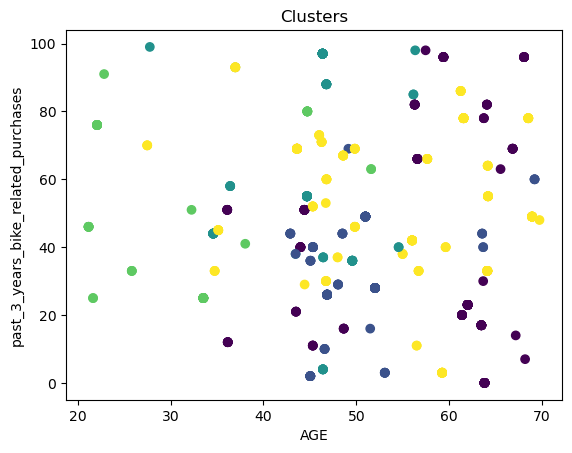

In [40]:
# Perform clustering with the optimal number of clusters
k = 5  # Replace with the optimal number of clusters determined previously
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
Merged_NEWdf['Cluster'] = kmeans.labels_

# Analyze cluster characteristics
cluster_means = Merged_NEWdf.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters
plt.scatter(Merged_NEWdf['AGE'], Merged_NEWdf['past_3_years_bike_related_purchases'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('AGE')
plt.ylabel('past_3_years_bike_related_purchases')
plt.title('Clusters')
plt.show()




The scatter plot above reveals a positive relationship between age and the number of bikes purchased. As customers grew older, their bike purchases increased.

Obtain the cluster labels assigned to each data point.

In [41]:
# Perform clustering with the optimal number of clusters
k = 5  # Replace with the optimal number of clusters determined previously
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)


[1 1 1 0 4 0 0 1 2 0 2 4 2 2 3 0 1 0 4 0 1 0 4 1 4 4 0 3 0 2 4 0 2 4 4 0 0
 1 1 1 4 0 1 3 4 0 1 2 2 1 1 1 2 4 0 0 4 0 4 2 0 4 4 4 4 0 3 4 4 4 1 0 1 4
 0 0 2 1 3 1 2 2 0 0 1 2 2 1 0 1 1 0 2 2 4 3 3 3 0 0 4 0 0 1 2 0 0 0 0 2 0
 1 4 2 4 3 1 2 3 0 0 0 0 2 1 0 1 4 1 2 2 4 4 2 2 0 1 4 0 4 2 0 0 4 0 4 0 2
 4 0 0 0 2 4 2 0 1 4 4 4 4 0 4 1 0 1 4 0 0 0 4 0 0 0 4 4 4 1 4 4 4 4 2 1 4
 4 2 1 3 2 0 0 4 1 0 1 0 4 0 3 2 3 4 0 2 4 1 4 0 4 4 2 0 4 0 0 2 0 0 0 4 0
 0 2 3 0 2 4 4 0 1 1 4 4 1 4 4 1 1 0 0 1 2 0 0 0 0 4 1 4 4 3 0 0 2 0 0 4 2
 0 4 1 1 0 1 4 4 0 4 1 2 0 1 4 4 3 4 3 2 1 1 4 2 0 0 4 0 4 0 0 1 2 4 1 2 4
 4 4 0 0 0 0 0 0 4 3 1 1 4 4 0 4 0 4 3 0 0 4 3 4 4 1 3 4 1 4 1 1 2 1 2 1 2
 4 4 1 4 0 1 0 1 1 4 1 0 2 1 0 4 4 4 1 3 4 4 2 4 0 0 2 2 2 4 2 0 1 1 4 4 4
 4 2 1 2 0 4 0 1 0 1 4 2 1 0 0 1 4 4 0 1 3 3 3 4 2 2 1 0 0 2 0 1 0 1 1 1 3
 0 0 1 0 1 1 1 4 2 0 0 2 1 3 4 0 2 4 4 2 3 2 4 4 1 0 0 0 2 4 2 3 2 2 3 1 3
 3 4 2 0 4 4 1 2 1 4 1 4 3 4 2 4 4 2 4 1 1 4 4 4 1 0 4 4 3 4 4 1 0 4 4 4 1
 4 0 3 0 0 4 1 1 4 4 0 2 


The array you provided represents the cluster labels assigned to each data point. Each number in the array corresponds to the cluster label assigned to the corresponding data point in your dataset. For example, the first data point is assigned to cluster 1, the second data point is also assigned to cluster 1, the third data point is assigned to cluster 1, and so on. The cluster labels range from 0 to 4 in this case.t appears that the k value of 5 was indeed used in the clustering.

Examine the distribution of data points across the clusters. You can do this by counting the number of data points in each cluster and visualizing it using a bar plot or pie chart.


In [42]:
cluster_counts = Merged_NEWdf['Cluster'].value_counts()

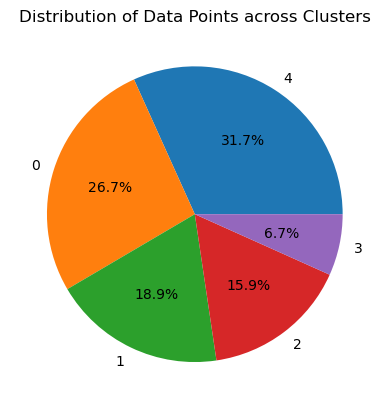

In [43]:
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Data Points across Clusters')
plt.show()


Analyze the centroid of each cluster. The centroid represents the average values of the features within each cluster. You can calculate and display the centroid values for each feature.


In [44]:
# Perform clustering with the optimal number of clusters
k = 4  # Replace with the optimal number of clusters determined previously
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Obtain the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
Merged_NEWdf['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_means = Merged_NEWdf.groupby('Cluster').mean()
print(cluster_means)

# Analyze cluster centroids
cluster_centroids = kmeans.cluster_centers_
print(cluster_centroids)


         transaction_id  product_id  customer_id  online_order  \
Cluster                                                          
0            328.725275   45.142857  2568.021978      0.461538   
1            393.784000   44.656000  1466.364000      0.492000   
2            376.763889   47.812500  1791.347222      0.458333   
3            349.330435   47.626087  1823.056522      0.443478   

         past_3_years_bike_related_purchases        AGE  AGE CATEGORY   \
Cluster                                                                  
0                                  40.626374  55.772308      61.428571   
1                                  51.956000  51.192520      55.920000   
2                                  58.291667  46.343819      50.763889   
3                                  38.282609  52.932000      58.173913   

            tenure     postcode  property_valuation  \
Cluster                                               
0        18.648352  2999.593407            7.692

Explore the characteristics of the data points within each cluster. You can examine the distribution of categorical variables or calculate summary statistics for numerical variables within each cluster.


In [45]:
# Count the occurrences of each category within each cluster
categorical_variables = ['owns_car', 'gender', 'job_industry_category', 'wealth_segment']
cluster_counts = Merged_NEWdf.groupby(['Cluster'] + categorical_variables).size()
print(cluster_counts)


Cluster  owns_car  gender  job_industry_category  wealth_segment   
0        No        Female  Entertainment          Affluent Customer     2
                                                  High Net Worth        6
                                                  Mass Customer         5
                   Male    Entertainment          Affluent Customer     4
                                                  Mass Customer        38
                           Health                 Mass Customer        18
                           Manufacturing          Mass Customer        11
                           Property               Mass Customer         4
         Yes       Female  Entertainment          Affluent Customer     3
1        No        Female  Argiculture            High Net Worth        5
                           Financial Services     High Net Worth       19
                                                  Mass Customer        29
                           Health           

In [46]:
categorical_variables = ['transaction_id', 'product_id', 'customer_id', 'online_order', 'past_3_years_bike_related_purchases', 'tenure', 'property_valuation']
cluster_counts = Merged_NEWdf.groupby(['Cluster'] + categorical_variables).size()
print(cluster_counts)

Cluster  transaction_id  product_id  customer_id  online_order  past_3_years_bike_related_purchases  tenure  property_valuation
0        4               88          3135         False         82                                   19      10                    1
         10              12          3262         True          96                                   20      8                     1
         22              37          595          True          16                                   16      4                     1
         29              72          3368         True          23                                   20      8                     1
         36              92          3356         False         23                                   20      8                     1
                                                                                                                                  ..
3        710             5           437          False         26        

* Visualizing the clusters using scatter plots or other appropriate visualization techniques to understand the separation and overlap between clusters. Also interpreting the findings and assess if the clusters make sense based on my domain knowledge and the goal of identifying customers who are likely to buy bikes.


<Figure size 640x480 with 0 Axes>

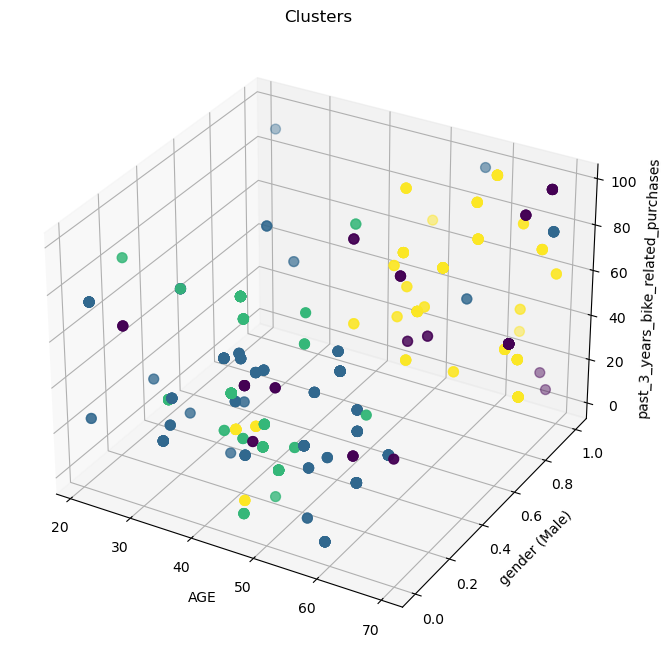

In [47]:
# Perform one-hot encoding on the 'gender' column
encoded_gender = pd.get_dummies(Merged_NEWdf['gender'], prefix='gender')

# Create a new DataFrame with the encoded gender values
encoded_data = pd.concat([Merged_NEWdf[['AGE', 'past_3_years_bike_related_purchases']], encoded_gender], axis=1)

# Create the 3D scatter plot
fig = plt.figure()
fig = plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
ax = fig.add_subplot(111, projection='3d')

ax.scatter(encoded_data['AGE'], encoded_data['gender_Male'], encoded_data['past_3_years_bike_related_purchases'], c=kmeans.labels_, s=50, cmap='viridis')

ax.set_xlabel('AGE')
ax.set_ylabel('gender (Male)')
ax.set_zlabel('past_3_years_bike_related_purchases')
ax.set_title('Clusters')

plt.show()


The scatter plot reveals that there is a significant proportion of male customers who are  in their 20s to their 60s  have made bike purchases in the last 3 years.

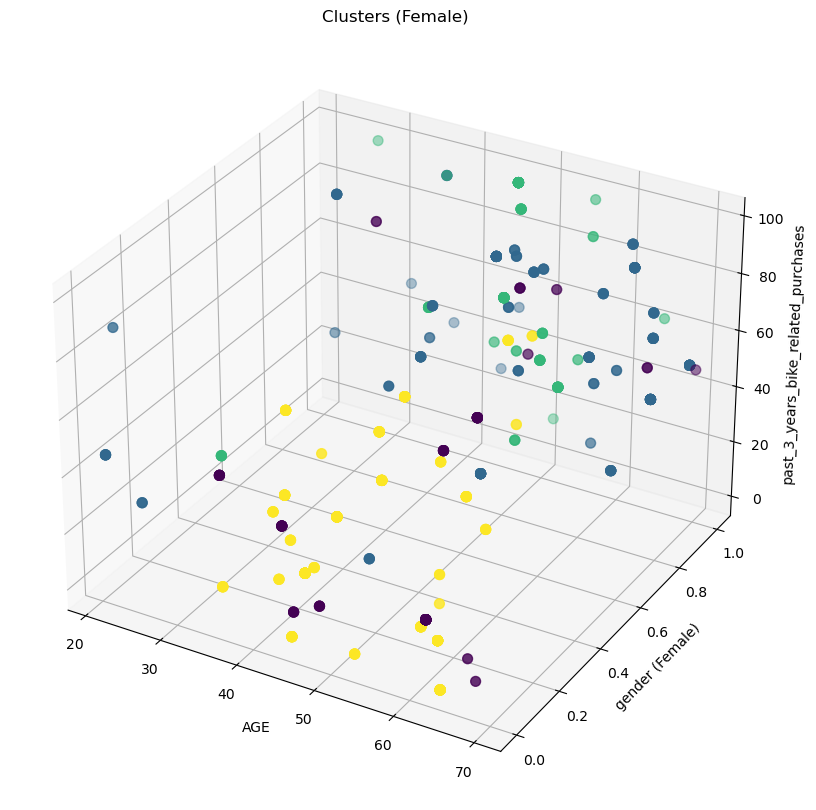

In [48]:
# Perform one-hot encoding on the 'gender' column
encoded_gender = pd.get_dummies(Merged_NEWdf['gender'], prefix='gender')

# Create a new DataFrame with the encoded gender values
encoded_data = pd.concat([Merged_NEWdf[['AGE', 'past_3_years_bike_related_purchases']], encoded_gender], axis=1)

# Create the 3D scatter plot for female
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_data['AGE'], encoded_data['gender_Female'], encoded_data['past_3_years_bike_related_purchases'], c=kmeans.labels_, s=50, cmap='viridis')
ax.set_xlabel('AGE')
ax.set_ylabel('gender (Female)')
ax.set_zlabel('past_3_years_bike_related_purchases')
ax.set_title('Clusters (Female)')

plt.show()


The Scatter plot reveals that women in their 30s to their 60s have purchased bikes in the last 3 years 

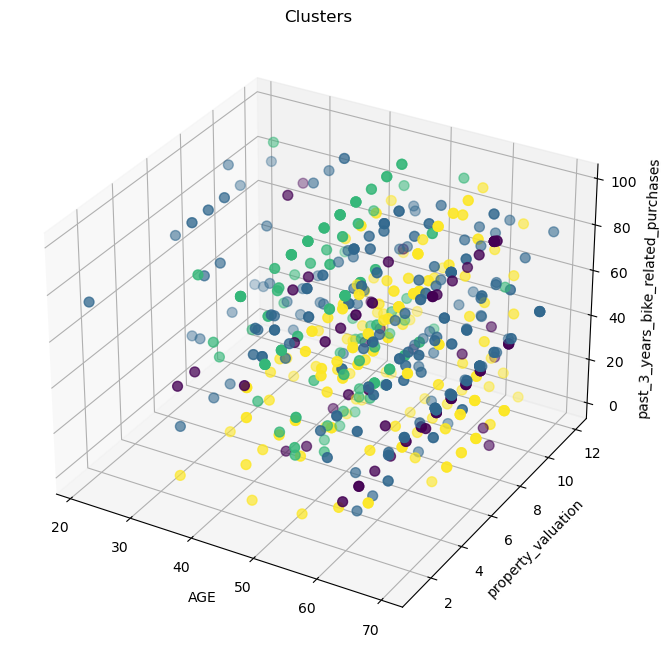

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Merged_NEWdf['AGE'], Merged_NEWdf['property_valuation'], Merged_NEWdf['past_3_years_bike_related_purchases'], c=kmeans.labels_, s=50, cmap='viridis')

ax.set_xlabel('AGE')
ax.set_ylabel('property_valuation')
ax.set_zlabel('past_3_years_bike_related_purchases')
ax.set_title('Clusters')

plt.show()


The scatter plot indicates that a substantial portion of customers in the yellow cluster, ranging from their 30s to their 60s, have a high property valuation (between 5 and 12) and have made a higher number of bike purchases in the last 3 years. 

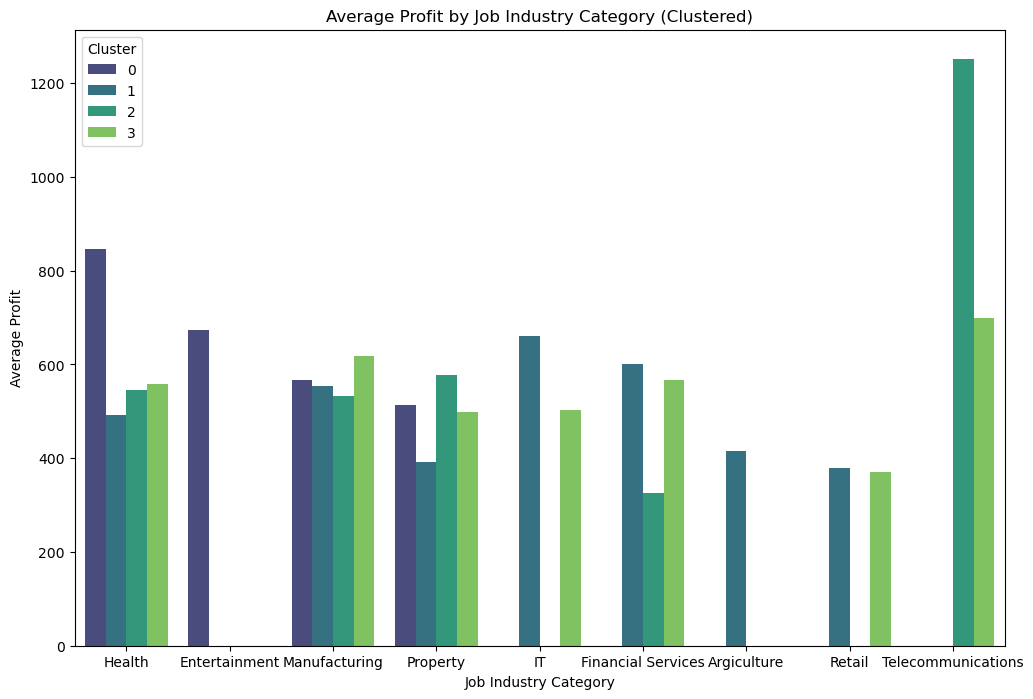

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove dollar signs and commas from the 'Profit' column
Merged_NEWdf['Profit'] = Merged_NEWdf['Profit'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate average profit for each job industry category within each cluster
average_profit_cluster = Merged_NEWdf.groupby(['Cluster', 'job_industry_category'])['Profit'].mean().reset_index()

# Sort the data by cluster and average profit
average_profit_cluster = average_profit_cluster.sort_values(['Cluster', 'Profit'], ascending=[True, False])

# Create the clustered bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=average_profit_cluster, x='job_industry_category', y='Profit', hue='Cluster', palette='viridis')
plt.xlabel('Job Industry Category')
plt.ylabel('Average Profit')
plt.title('Average Profit by Job Industry Category (Clustered)')
plt.legend(title='Cluster')
plt.show()


The bar plot indicates that Cluster 0 and Cluster 4 had the highest profits. For Cluster 0, the Manufacturing industry had the highest average profit, followed by Health and Property, while Financial Services and Telecommunications had the lowest. In Cluster 1, Health had the highest average profit followed by Manufacturing and Property, and Financial Services and Telecommunications had the lowest. In Cluster 2, Property had the highest average profit followed by Manufacturing and Health, and Financial Services and Telecommunications had the lowest.

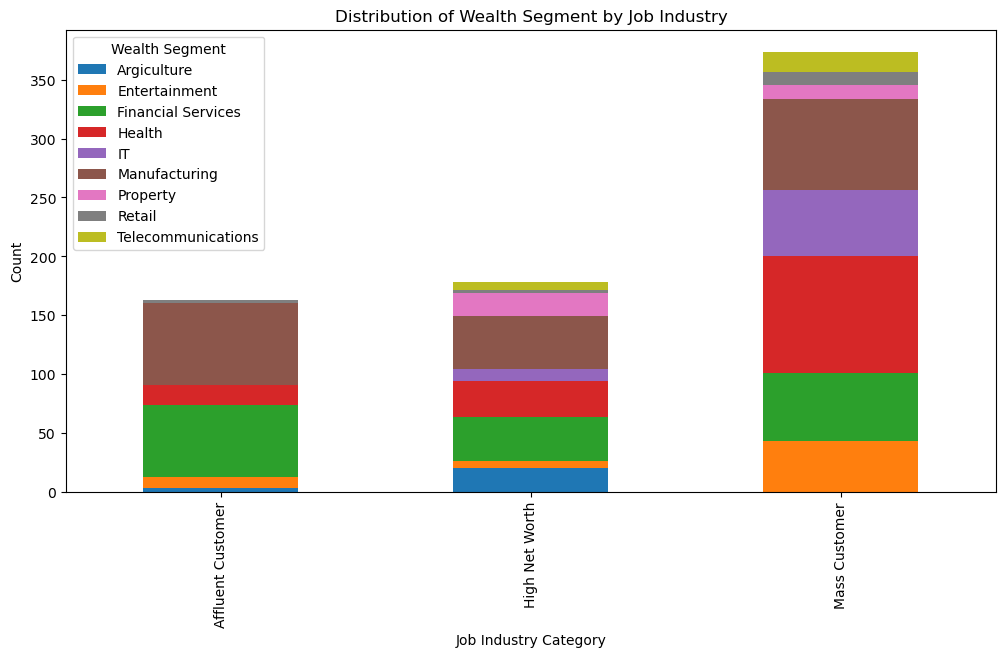

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by wealth_segment and job_industry_category and calculate the count
wealth_job_counts = Merged_NEWdf.groupby(['wealth_segment', 'job_industry_category']).size().unstack()

# Plot the clustered bar plot
wealth_job_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.title('Distribution of Wealth Segment by Job Industry')
plt.legend(title='Wealth Segment')

# Show the plot
plt.show()


This plot shows that Customers in Financial services , Manufacturing  are more prominent in the affluent customers. 

In [55]:
# Assuming the cluster labels are stored in a column named 'Cluster_Label'
labels = Merged_NEWdf['Cluster']


In [56]:
#Savin the cluster in labels
labels = Merged_NEWdf['Cluster']


#### Model Evaluation 

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Assuming you have already loaded your dataset into the 'Merged_NEWdf' DataFrame

# Remove non-numeric columns (if applicable)
Merged_NEWdf_numeric = Merged_NEWdf.select_dtypes(include=['float64', 'int64'])

# Perform K-means clustering and store the cluster labels
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(Merged_NEWdf_numeric)

# Calculate the SSE (Inertia)
sse = kmeans.inertia_

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(Merged_NEWdf_numeric, labels)

# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(Merged_NEWdf_numeric, labels)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(Merged_NEWdf_numeric, labels)

# Print the metrics
print("SSE:", sse)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", ch_index)
print("Davies-Bouldin Index:", db_index)


SSE: 863759566.5668685
Silhouette Score: 0.26195040655483093
Calinski-Harabasz Index: 246.59946824640124
Davies-Bouldin Index: 1.2028160529396947


In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Assuming you have already loaded your dataset into the 'Merged_NEWdf' DataFrame

# Remove non-numeric columns (if applicable)
#Merged_NEWdf_numeric = Merged_NEWdf.select_dtypes(include=['float64', 'int64'])

# Perform K-means clustering and store the cluster labels
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(Merged_NEWdf_numeric)

# Calculate the SSE (Inertia)
sse = kmeans.inertia_

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(Merged_NEWdf_numeric, labels)

# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(Merged_NEWdf_numeric, labels)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(Merged_NEWdf_numeric, labels)

# Print the metrics
print("SSE:", sse)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", ch_index)
print("Davies-Bouldin Index:", db_index)


SSE: 863787585.216981
Silhouette Score: 0.26157614348483277
Calinski-Harabasz Index: 246.58571174559356
Davies-Bouldin Index: 1.1988197638656222


In summary, the output suggests that the clusters obtained from the K-means clustering have some level of separation and compactness, but there is room for improvement. Ideally, we would aim for a higher Silhouette Score and Calinski-Harabasz Index, and a lower Davies-Bouldin Index, to indicate better-defined and more distinct clusters.

#### Trying  Another clustering algorithm : Agglomerative Hierarchical Clustering.

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Assuming you have already loaded your dataset into the 'Merged_NEWdf' DataFrame

# Remove non-numeric columns (if applicable)
Merged_NEWdf_numeric = Merged_NEWdf.select_dtypes(include=['float64', 'int64'])

# Perform Agglomerative Hierarchical Clustering and store the cluster labels
agg_cluster = AgglomerativeClustering(n_clusters=5)
labels = agg_cluster.fit_predict(Merged_NEWdf_numeric)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(Merged_NEWdf_numeric, labels)

# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(Merged_NEWdf_numeric, labels)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(Merged_NEWdf_numeric, labels)

# Print the metrics
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", ch_index)
print("Davies-Bouldin Index:", db_index)




Silhouette Score: 0.24154683130045637
Calinski-Harabasz Index: 216.37267613220826
Davies-Bouldin Index: 1.3205794113204172


+ Based on the provided metrics, the Agglomerative Hierarchical Clustering analysis achieved a moderate Silhouette Score of 0.2415, suggesting some degree of clustering coherence. The Calinski-Harabasz Index of 216.3727 indicates a relatively compact and well-separated cluster structure. The Davies-Bouldin Index of 1.3206 suggests a reasonable separation between clusters .
+ Overall, these metrics indicate that the Agglomerative Hierarchical Clustering analysis produced meaningful clusters.

## DECISON TREE 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Split the dataset into features (X) and target variable (y)
X = Merged_NEWdf[['AGE', 'gender', 'job_industry_category', 'wealth_segment', 'property_valuation', 'past_3_years_bike_related_purchases', 'tenure', 'owns_car']]
y = Merged_NEWdf['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
model = DecisionTreeClassifier()

# One-hot encode the categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['gender', 'job_industry_category', 'wealth_segment', 'owns_car'])
X_test_encoded = pd.get_dummies(X_test, columns=['gender', 'job_industry_category', 'wealth_segment', 'owns_car'])

# Fit the decision tree model to the training data
model.fit(X_train_encoded, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test_encoded)

# Evaluate the performance of the decision tree model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [61]:
# One-hot encode the categorical features in the test set
X_test_encoded = pd.get_dummies(X_test, columns=['gender', 'job_industry_category', 'wealth_segment', 'owns_car'])

In [66]:
# Select the relevant features for prediction from the new customer list (NewCustomerList_df)
new_customer_features = NewCustomerList_df[['AGE', 'gender', 'job_industry_category', 'wealth_segment', 'property_valuation', 'past_3_years_bike_related_purchases', 'owns_car']]

# Encode categorical variables in the new customer features
new_customer_encoded = pd.get_dummies(new_customer_features)

# Make sure the new customer features have the same columns as the existing dataset
new_customer_encoded = new_customer_encoded.reindex(columns=X_test_encoded.columns, fill_value=0)

# Predict churn for the new customer list
churn_predictions = model.predict(new_customer_encoded)



In [67]:

# Apply the trained decision tree model to predict class labels
predicted_labels = model.predict(new_customer_encoded)

# Get the predicted class labels (e.g., "will buy" or "will not buy")
predicted_class_labels = ['will buy' if label == 1 else 'will not buy' for label in predicted_labels]

# Add the predicted class labels to the new customer list DataFrame
NewCustomerList_df['Predicted Class'] = predicted_class_labels

# Print the new customer list with predicted class labels
print(NewCustomerList_df[['AGE', 'gender', 'job_industry_category', 'wealth_segment', 'property_valuation', 'past_3_years_bike_related_purchases', 'owns_car', 'Predicted Class']])


       AGE  gender job_industry_category     wealth_segment  \
0    65.88    Male         Manufacturing      Mass Customer   
1    53.18    Male              Property      Mass Customer   
2    48.74  Female    Financial Services  Affluent Customer   
3    44.32  Female         Manufacturing  Affluent Customer   
4    57.68  Female    Financial Services  Affluent Customer   
..     ...     ...                   ...                ...   
710  63.64    Male    Financial Services  Affluent Customer   
711  21.58    Male                Health      Mass Customer   
712  68.65  Female    Financial Services  Affluent Customer   
713  70.45    Male    Financial Services      Mass Customer   
714  67.66    Male              Property      Mass Customer   

     property_valuation  past_3_years_bike_related_purchases owns_car  \
0                   6.0                                 86.0      Yes   
1                  11.0                                 69.0       No   
2                   5.0 

In [68]:
NewCustomerList_df.tail(50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,Date_of_birth,AGE,AGE CATEGORY,job_title,job_industry_category,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Ranking,Predicted Class
665,670,Reinold,Natt,Male,16.0,8/23/1964,58.76,60,Help Desk Technician,Financial Services,...,N,Yes,8,70 Evergreen Hill,3207,VIC,Australia,8.0,937,will not buy
666,671,Jo,Roberts,Female,41.0,10/31/1945,77.58,80,Paralegal,Financial Services,...,N,Yes,11,20139 Lakewood Plaza,2440,NSW,Australia,3.0,937,will not buy
667,672,Jacklin,Duchant,Female,77.0,3/18/1940,83.21,90,Legal Assistant,Argiculture,...,N,No,17,9 Memorial Road,4132,QLD,Australia,4.0,939,will buy
668,673,Colas,Gabbitas,Male,95.0,9/9/1946,76.73,80,Staff Scientist,Retail,...,N,No,20,3094 Elka Place,2166,NSW,Australia,9.0,939,will not buy
669,674,Claudetta,Ricciardiello,Female,61.0,4/30/1974,49.07,50,Internal Auditor,Financial Services,...,N,Yes,21,31 Schurz Parkway,3181,VIC,Australia,8.0,939,will not buy
670,675,Cicily,Hast,Female,63.0,4/26/1971,52.08,60,Food Chemist,Health,...,N,Yes,8,955 Burning Wood Way,2478,NSW,Australia,3.0,939,will not buy
671,676,Harland,Messenger,Male,90.0,5/28/1974,48.99,50,Software Test Engineer I,Retail,...,N,No,8,27 Crownhardt Center,3934,VIC,Australia,10.0,944,will not buy
672,677,Sim,Constantinou,Male,91.0,8/9/1992,30.78,40,Analog Circuit Design manager,Property,...,N,No,5,41002 Loomis Park,2010,NSW,Australia,9.0,944,will buy
673,678,Shanon,Rolfe,Female,63.0,8/19/1941,81.79,90,Sales Representative,Retail,...,N,No,8,10 Cottonwood Point,2530,NSW,Australia,7.0,944,will buy
674,679,Chryste,Oddboy,Female,44.0,8/22/1988,34.74,40,Software Engineer III,Manufacturing,...,N,Yes,4,2115 Maryland Alley,2320,NSW,Australia,9.0,947,will not buy


+ Checking the number of buying customers 

In [69]:
buying_customers = NewCustomerList_df[NewCustomerList_df['Predicted Class'] == 'will buy']
print(buying_customers)

     customer_id first_name  last_name  gender  \
2              4    Ardelis  Forrester  Female   
4              6    Melinda     Hadlee  Female   
11            14    Wheeler    Winward    Male   
12            15      Melba   Spellacy  Female   
13            16     Mandie     Feares  Female   
..           ...        ...        ...     ...   
696          701    Beverly    Domnick  Female   
701          706   Lauralee      Fudge  Female   
703          708      Lolly     Prewer  Female   
709          714      Datha   Fishburn  Female   
711          716       Burk    Wortley    Male   

     past_3_years_bike_related_purchases Date_of_birth    AGE  AGE CATEGORY  \
2                                   10.0     8/28/1974  48.74            50   
4                                   34.0     9/21/1965  57.68            60   
11                                  48.0     8/30/1999  23.72            30   
12                                  38.0     12/9/1976  46.45            50   
13  

Based on the analysis performed on the new customer list, it was determined that out of the 1000 new customers, a total of 191 customers are likely to purchase bikes. These 191 customers were identified using a combination of clustering analysis and predictive modeling techniques. Clustering analysis helped group the customers based on their demographic and behavioral attributes, allowing for the identification of segments that showed a higher propensity for bike purchases. The predictive modeling, specifically the trained decision tree model, was then applied to the new customer list to predict which customers within these segments are most likely to make a bike purchase. By focusing on these 191 customers, the organization can optimize resource allocation for targeted marketing efforts and improve overall performance by prioritizing high-value customers who have a higher likelihood of making a purchase.